### Explore the summary stats by plotting the histogram

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pickle

In [3]:
data = np.load('../../../arco_sims/hay_objectives_init_noise/hay_objectives_noisy.npz', allow_pickle=True)

x = torch.as_tensor(data['data'], dtype=torch.float32)
theta_not_standardized = torch.as_tensor(data['params'], dtype=torch.float32)

In [4]:
x_not_standardized = deepcopy(x)

In [6]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)

x = (x-x_mean) / x_std
x = x.numpy()

### Load x_o

In [7]:
import pickle
#with open('../results/observation/x_o_new_ss.pickle', 'rb') as handle:
#    x_o = pickle.load(handle)
    
#x_o = torch.as_tensor(x_o)

x_o = torch.as_tensor(np.load('../results/observation/x_o_hay.npz')['x_o'], dtype=torch.float32)
x_o_dict = np.load('../results/observation/x_o_hay.npz', allow_pickle=True)['x_o_dict'].tolist()
x_o = (x_o - x_mean) / x_std
x_o = x_o.unsqueeze(0)
x_o = x_o.numpy()

In [8]:
x_o_raw = torch.as_tensor(np.load('../results/observation/x_o_hay.npz')['x_o'], dtype=torch.float32)

In [9]:
x_o_raw

tensor([0.6275, 1.0714, 0.0000, 1.8408, 0.1828, 1.5292, 0.0182, 0.6768, 2.0597,
        0.0000, 0.5047])

In [10]:
x_o_dict

{'BAC_caSpike_width': 0.6274534587685928,
 'bAP_APheight': 1.0713827300032157,
 'bAP_spikecount': 0.0,
 'bAP_APwidth': 1.8408072988456752,
 'BAC_ahpdepth': 0.18275835693996356,
 'BAC_caSpike_height': 1.5292215518128254,
 'bAP_att3': 0.01819408397980317,
 'BAC_APheight': 0.676753127459311,
 'BAC_ISI': 2.05966611846767,
 'BAC_spikecount': 0.0,
 'bAP_att2': 0.504650278595571}

Minimum:   -3.7375097
Maximum:   0.7521026


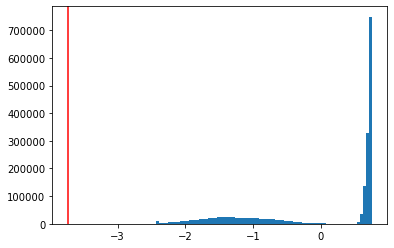

Minimum:   -1.4313943
Maximum:   0.7045153


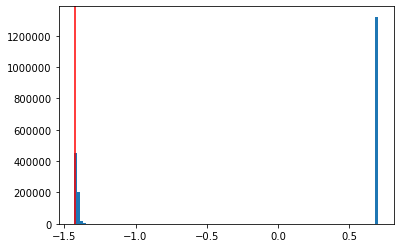

Minimum:   -1.4182897
Maximum:   0.70030177


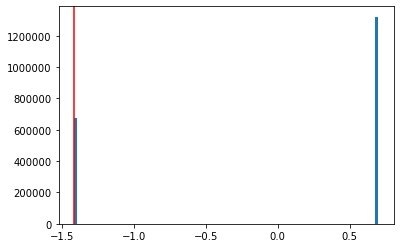

Minimum:   -1.4305758
Maximum:   0.7045795


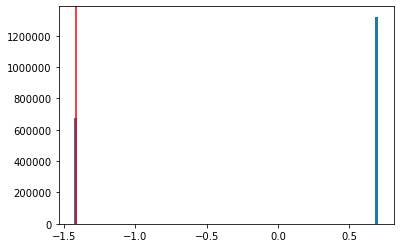

Minimum:   -3.7487547
Maximum:   0.7520888


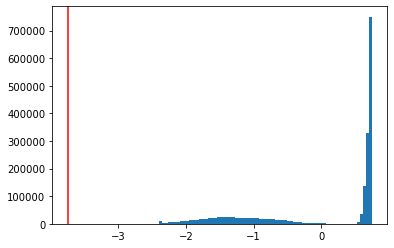

Minimum:   -3.7489045
Maximum:   0.7520946


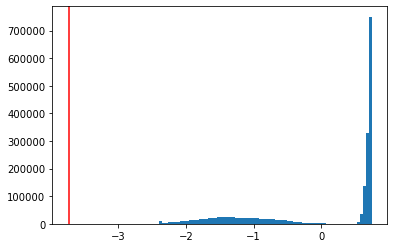

Minimum:   -1.4563358
Maximum:   0.7061472


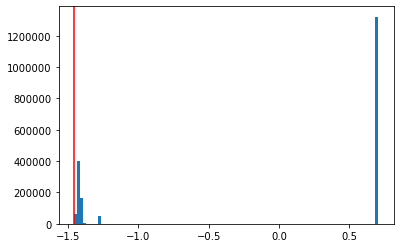

Minimum:   -3.7159097
Maximum:   0.75208986


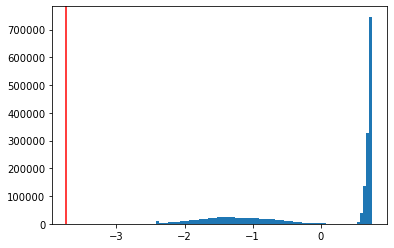

Minimum:   -3.7415948
Maximum:   0.7520917


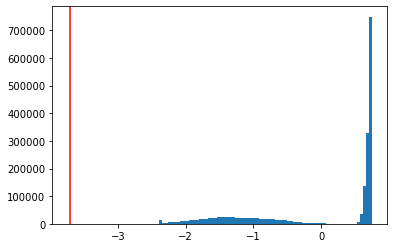

Minimum:   -3.750874
Maximum:   0.7521955


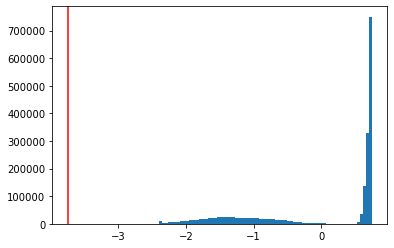

Minimum:   -1.4402333
Maximum:   0.7062133


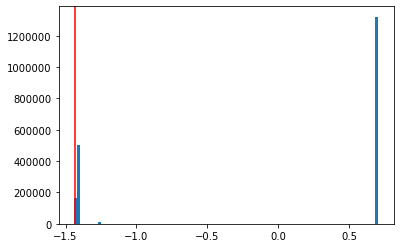

In [11]:
for i in range(11):
    print("Minimum:  ", np.min(x[:, i]))
    print("Maximum:  ", np.max(x[:, i]))
    plt.hist(x[:, i], bins=100)
    plt.axvline(x_o[0, i], color='r')
    plt.show()

## Use this to clean up the data
If a sample is larger than 10 standard deviations away from the mean -> discard it because it might break training.

In [28]:
no_value_too_large = np.all(x < 10.0, axis=1)

In [29]:
x_clear = x_not_standardized[no_value_too_large].numpy()
x_clear_standardized = x[no_value_too_large]
theta_clear = theta_not_standardized[no_value_too_large].numpy()

In [30]:
x_clear.shape

(1992007, 35)

In [31]:
no_value_too_small = np.all(x_clear_standardized > -10.0, axis=1)
x_fully_clear = x_clear[no_value_too_small]
theta_fully_clear = theta_clear[no_value_too_small]

In [32]:
x_fully_clear.shape

(1992007, 35)

In [12]:
np.savez('../results/cleaned_up_data2.npz', data=x_fully_clear, params=theta_fully_clear)

### Repeat the whole analysis with the cleaned up dataset just to be sure everything worked

In [33]:
data = np.load('../results/cleaned_up_data2.npz', allow_pickle=True)

x = torch.as_tensor(data['data'], dtype=torch.float32)
theta_not_standardized = torch.as_tensor(data['params'], dtype=torch.float32)

In [34]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)

x = (x-x_mean) / x_std
x = x.numpy()

In [36]:
x_o = torch.as_tensor(np.load('../results/observation/x_o_new_ss.npz')['x_o'], dtype=torch.float32)

x_o = (x_o - x_mean) / x_std
x_o = x_o.unsqueeze(0)
x_o = x_o.numpy()

Minimum:   -0.7077955
Maximum:   12.544675


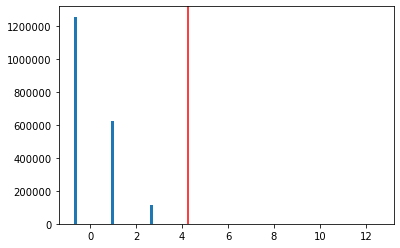

Minimum:   -2.7176726
Maximum:   3.1002824


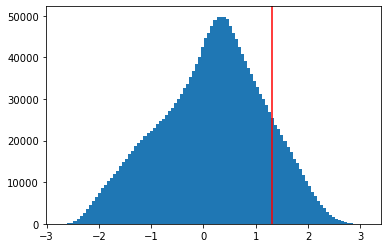

Minimum:   -2.2936792
Maximum:   5.8439784


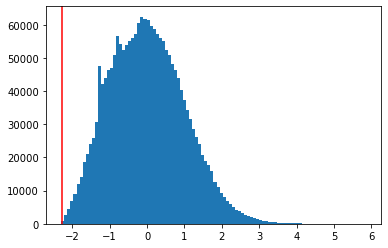

Minimum:   -1.7758272
Maximum:   3.1717703


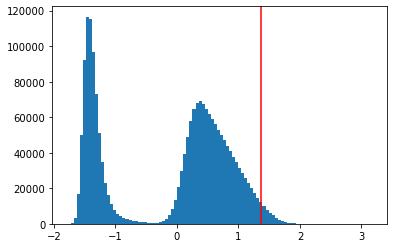

Minimum:   -1.0529552
Maximum:   9.068064


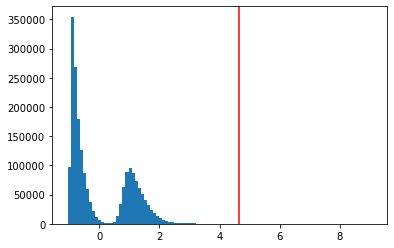

Minimum:   -1.325094
Maximum:   2.1887193


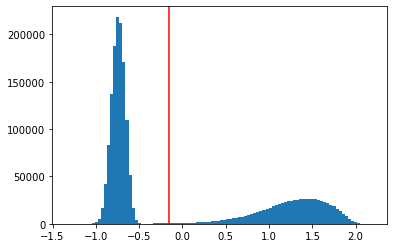

Minimum:   -0.8033734
Maximum:   2.7433746


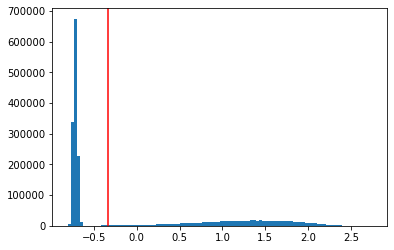

Minimum:   -0.5212071
Maximum:   10.588378


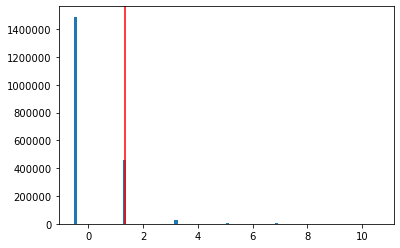

Minimum:   -2.7967637
Maximum:   3.659217


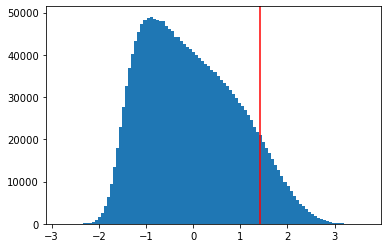

Minimum:   -2.273808
Maximum:   5.874178


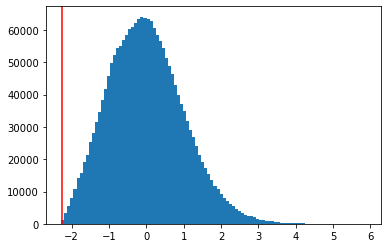

Minimum:   -2.3365386
Maximum:   11.730155


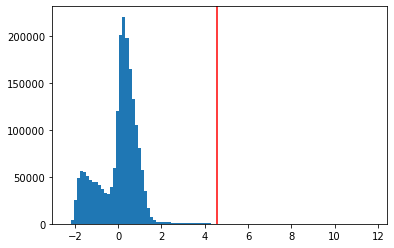

Minimum:   -0.7170338
Maximum:   10.0381775


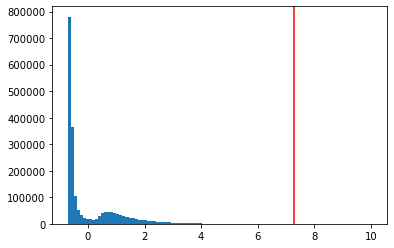

Minimum:   -4.0995083
Maximum:   3.5376003


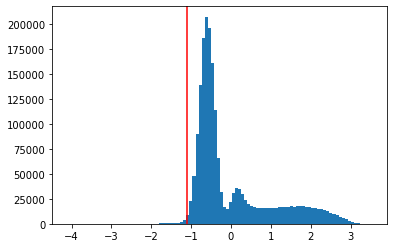

Minimum:   -0.88608485
Maximum:   5.001058


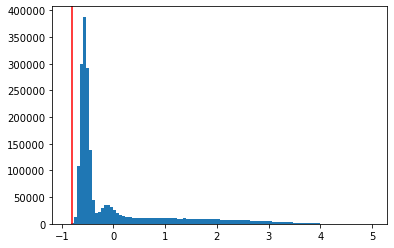

Minimum:   -0.7630444
Maximum:   13.712182


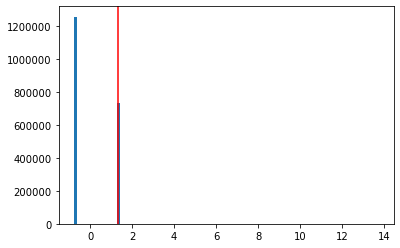

Minimum:   -2.7822964
Maximum:   3.125047


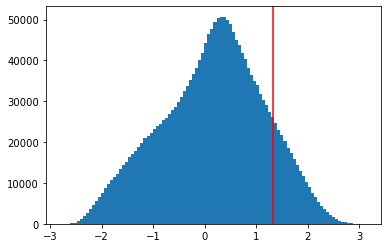

Minimum:   -2.3005345
Maximum:   5.746834


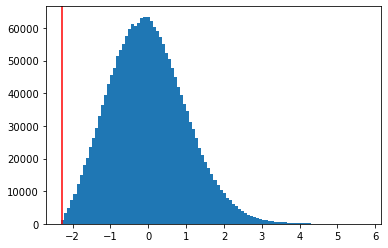

Minimum:   -1.5889096
Maximum:   2.1098416


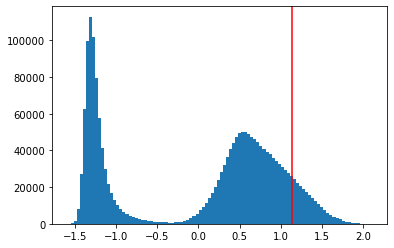

Minimum:   -1.0571946
Maximum:   9.68623


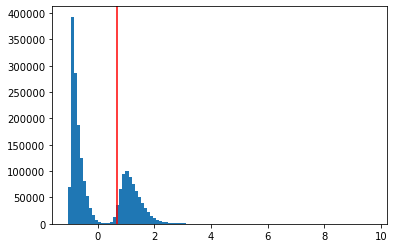

Minimum:   -1.2778456
Maximum:   2.198085


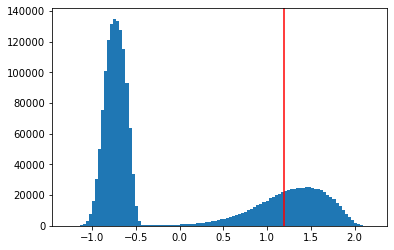

Minimum:   -0.83266073
Maximum:   2.7142856


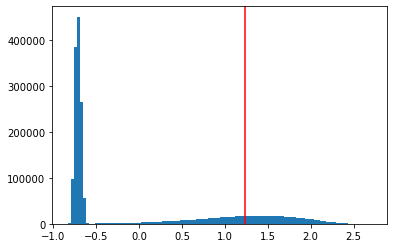

Minimum:   -0.47183642
Maximum:   9.840688


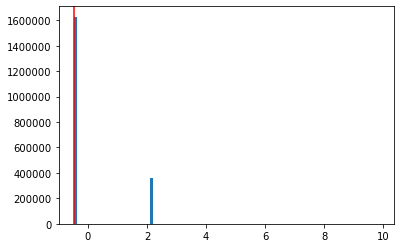

Minimum:   -2.635943
Maximum:   3.4980218


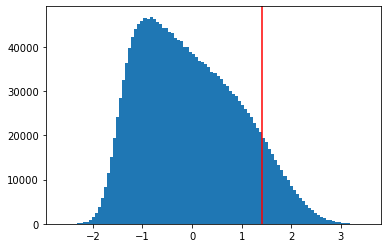

Minimum:   -2.3030329
Maximum:   5.769441


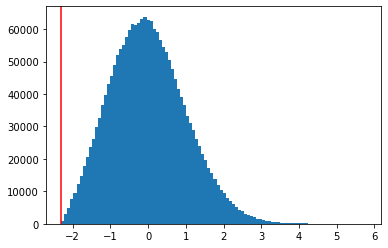

Minimum:   -3.1895232
Maximum:   9.476597


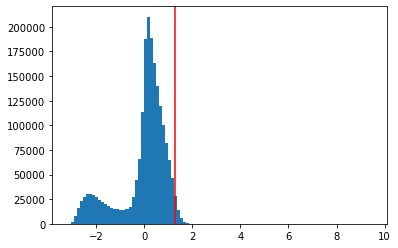

Minimum:   -0.5292291
Maximum:   11.4137945


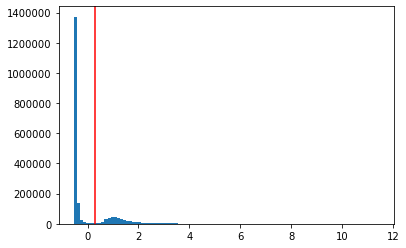

Minimum:   -1.7231853
Maximum:   3.7573555


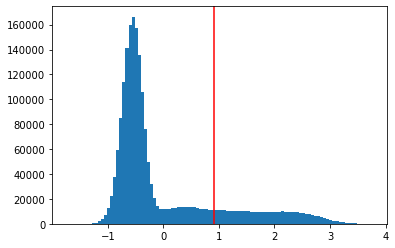

Minimum:   -0.7296606
Maximum:   5.3418546


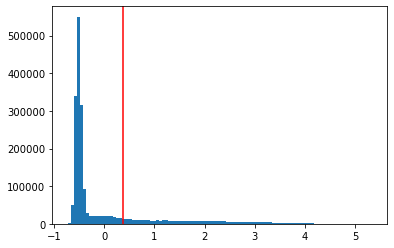

Minimum:   -0.24832965
Maximum:   26.035166


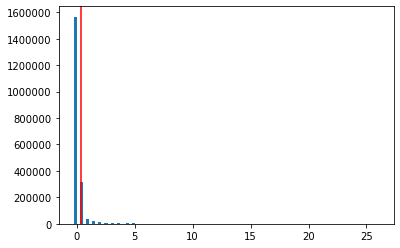

Minimum:   -3.3079782
Maximum:   4.6844134


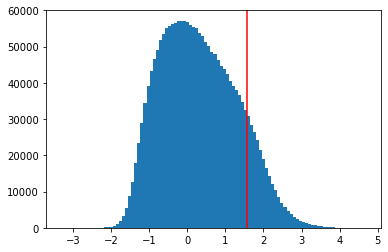

Minimum:   -2.3005085
Maximum:   5.7770343


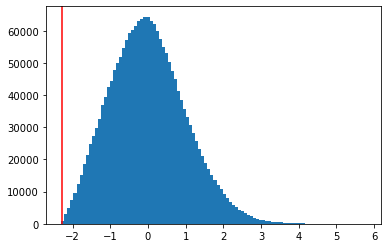

Minimum:   -3.005375
Maximum:   12.23934


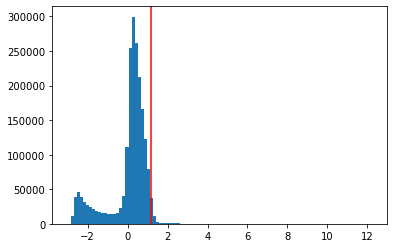

Minimum:   -0.40550232
Maximum:   11.997803


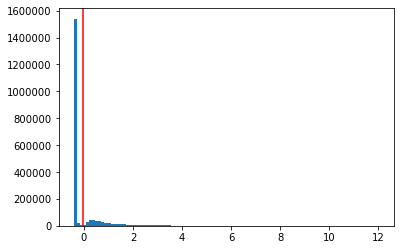

Minimum:   -1.6523019
Maximum:   4.1755724


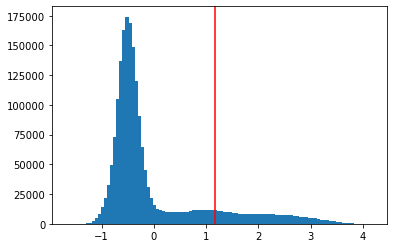

Minimum:   -0.6604772
Maximum:   6.3405533


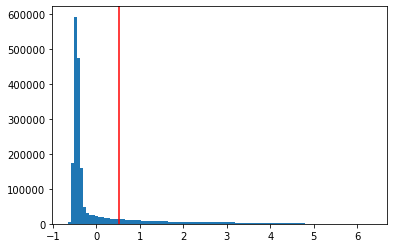

In [37]:
for i in range(35):
    print("Minimum:  ", np.min(x[:, i]))
    print("Maximum:  ", np.max(x[:, i]))
    plt.hist(x[:, i], bins=100)
    plt.axvline(x_o[0, i], color='r')
    plt.show()